In [141]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [142]:
num_particles = 12
iterations = 100

w = 1.0      # inertia weight
c1 = 2.5     # cognitive component
c2 = 0.5     #social component


plane_width = 24
plane_height = 8

In [143]:
cost = 20
production = 10

N = 10

In [144]:
def visualize_matrix(matrix, title="Binary Matrix"):
    plt.figure(figsize=(5, 3))
    plt.imshow(matrix, cmap='binary', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

In [145]:
particles = np.random.uniform(low=0, high=1, size=(num_particles, plane_height, plane_width ))
particles = np.where(particles < 0.5, 0, 1)

velocities = np.zeros((num_particles, plane_height, plane_width))

pbest = np.copy(particles)
pbest_scores = np.array([-np.inf] * num_particles)
gbest_score = -np.inf
gbest = particles[0]

In [146]:
def evaluate(particle):
    my_production = 0
    my_production += np.sum(np.indices(particle.shape) * particle)
    #print(my_production)
    
    return my_production



In [154]:
for _ in range(iterations):
    for i in range(num_particles):
        fitness = evaluate(particles[i])
        if fitness > pbest_scores[i]:
            pbest_scores[i] = fitness
            pbest[i] = particles[i]
        if fitness > gbest_score:
            gbest_score = fitness
            gbest = particles[i]

    for i in range(num_particles):
        # Sebesség frissítése

        velocities[i] = w * velocities[i] + c1 * np.random.rand() * (pbest[i] - particles[i]) + c2 * np.random.rand() * (gbest - particles[i])
        #visualize_matrix(velocities[i], title=f"Velocity of particle {i} at iteration {_}")
        flat_indices = np.argsort(velocities[i].ravel())[::-1]
        threshold_index = flat_indices[N]  # Get the index of the N-th largest value
        threshold_value = velocities[i].ravel()[threshold_index]
        
        # Create a binary matrix based on the threshold value
        binary_matrix = np.where(velocities[i] >= threshold_value, 1, 0)
        
        # In case of tie, randomly assign 1s to the tied values
        tied_indices = np.where(velocities[i] == threshold_value)
        num_tied = len(tied_indices[0])
        if num_tied > N:
            chosen_indices = np.random.choice(num_tied, N, replace=False)
            binary_matrix[tied_indices] = 0
            binary_matrix[tied_indices[0][chosen_indices], tied_indices[1][chosen_indices]] = 1
        
        velocities[i] = binary_matrix
        #visualize_matrix(velocities[i], title=f"Velocity of particle {i} at iteration {_}")


        particles[i] = particles[i].astype(np.float64) + velocities[i]
        # Convert velocities[i] to a binary matrix


        flat_indices = np.argsort(particles[i].ravel())[::-1]
        threshold_index = flat_indices[N]  # Get the index of the N-th largest value
        threshold_value = particles[i].ravel()[threshold_index]
        
        # Create a binary matrix based on the threshold value
        binary_matrix = np.where(particles[i] >= threshold_value, 1, 0)
        
        # In case of tie, randomly assign 1s to the tied values
        tied_indices = np.where(particles[i] == threshold_value)
        num_tied = len(tied_indices[0])
        if num_tied > N:
            chosen_indices = np.random.choice(num_tied, N, replace=False)
            binary_matrix[tied_indices] = 0
            binary_matrix[tied_indices[0][chosen_indices], tied_indices[1][chosen_indices]] = 1
        
        particles[i] = binary_matrix
    #visualize_matrix(gbest, title=f"Best particle at iteration {_}")
    print(evaluate(gbest))
        


328
177
173
161
177
191
149
129
231
156
151
158
148
155
181
244
183
185
217
147
139
149
157
162
160
293
199
285
176
241
241
172
172
298
191
178
177
233
341
181
302
325
325
194
186
147
169
177
165
189
205
175
184
250
357
190
216
186
209
172
162
142
217
117
158
155
133
151
242
147
135
155
177
272
171
211
264
171
239
140
148
205
196
321
195
260
177
236
186
255
193
136
184
199
288
178
224
145
148
189


In [148]:
print("Optimális pozíció (termelési mennyiségek):", gbest)
print("Maximális bevétel:", gbest_score)

Optimális pozíció (termelési mennyiségek): [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Maximális bevétel: 1768


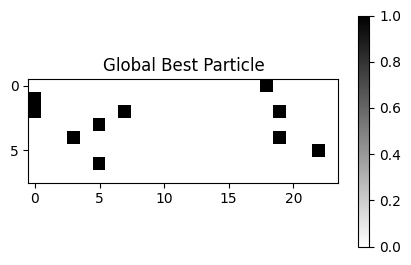

In [149]:


# Visualize the global best particle
visualize_matrix(gbest, title="Global Best Particle")

In [150]:
particles[2] 


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])